In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from TSP import compute_distance_matrix, visualize
from GA import solve

In [2]:
def analyze_ga(
    csv_file: str,
    population_size: int = 100,
    generations: int = 200,
    mutation_rate: float = 0.01,
    mutation_algorithm: str = 'swap',
    crossover_algorithm: str = 'single_point',
    selection_algorithm: str = 'tournament',
    show_fitness_plot: bool = True,
    show_route_plot: bool = True
) -> dict:
    """
    Run GA on a CSV of city coordinates and display results.
    Returns a dict with best_distance, best_route, fitness_history, time_sec.
    """
    # Load locations
    df = pd.read_csv(csv_file)
    if 'lat' in df.columns and 'lon' in df.columns:
        locations = list(zip(df['lat'], df['lon']))
    else:
        arr = df.values
        locations = [(float(r[1]), float(r[2])) for r in arr[1:]]

    # Compute distance matrix
    dist_mat = compute_distance_matrix(locations)

    # Run GA
    t0 = time.time()
    best_distance, best_route, fitness_history = solve(
        dist_mat,
        population_size=population_size,
        generations=generations,
        mutation_rate=mutation_rate,
        mutation_algorithm=mutation_algorithm,
        crossover_algorithm=crossover_algorithm,
        selection_algorithm=selection_algorithm
    )
    elapsed = time.time() - t0

    # Print results
    print(f"\n--- RESULTS for {csv_file} ---")
    print(f"Best route : {best_route}")
    print(f"Total dist : {best_distance:.2f} km")
    print(f"Time elapsed: {elapsed:.2f} s")

    # Plot fitness curve
    if show_fitness_plot:
        # plt.figure(figsize=(6,4))
        # plt.plot(fitness_history, marker='o', linestyle='-')
        # plt.title(f"Fitness over generations (population_size={population_size}, generations={generations})")
        # plt.xlabel("Generation")
        # plt.ylabel("Best fitness")
        # plt.grid(True)
        # plt.show()

        plt.figure(figsize=(8, 5))
        plt.plot(fitness_history, marker=None, linestyle='-')
        plt.title('Fitness over generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot route
    # if show_route_plot:
    #     visualize(locations, [c-1 for c in best_route], title=f"Route for {csv_file}")

    # Return dict
    return {
        'best_distance':     best_distance,
        'best_route':        best_route,
        'fitness_history':   fitness_history,
        'time_sec':          elapsed
    }


# MẶC ĐỊNH
- THUẬT TOÁN
    - SELECTION = TOURNAMENT
    - CROSSOVER = SINGLE POINT
    - MUTATION = SWAP
- THAM SỐ
    - POPULATION SIZE = 100
    - GENERATIONS = 200
    - MUTATION RATE = 0.01

## TRƯỜNG HỢP 1: NHÓM NHỎ (3-6 THÀNH PHỐ)

1. Bộ ThreeProvinces.csv (3 thành phố)


--- RESULTS for ../data/1_ThreeProvinces.csv ---
Best route : [1, 3, 2, 1]
Total dist : 209.51 km
Time elapsed: 0.06 s


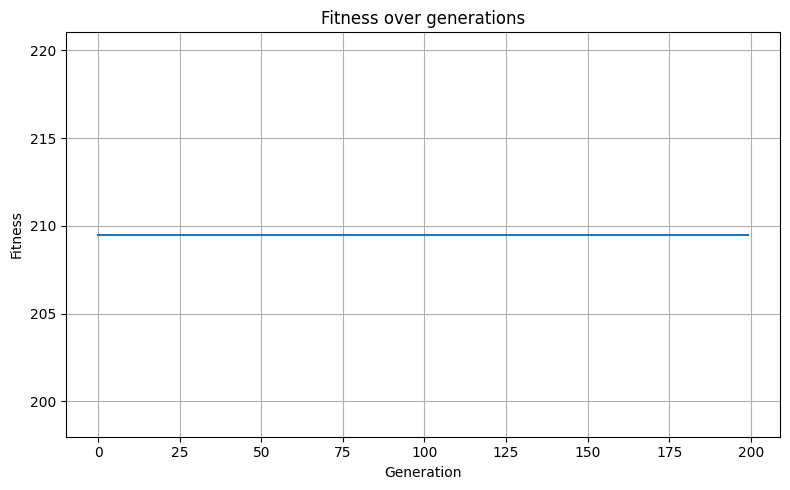

In [3]:
resultN1 = analyze_ga(
    "../data/1_ThreeProvinces.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)


2. SouthEast.csv (6 thành phố)


--- RESULTS for ../data/2_SouthEast.csv ---
Best route : [1, 6, 5, 3, 2, 4, 1]
Total dist : 426.02 km
Time elapsed: 0.07 s


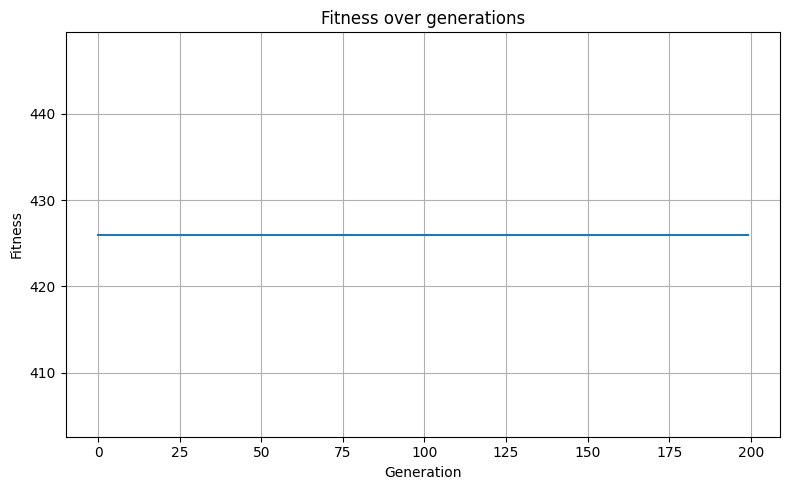

In [4]:
resulN2 = analyze_ga(
    "../data/2_SouthEast.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)


**Kết luận:** Với bộ dữ liệu nhóm nhỏ có sự hội tụ nhanh ở các thể hệ đầu, vì thế chỉ cần dùng các thông số mặc định để tìm ra lời giải tối ưu.

## TRƯỜNG HỢP 2: NHÓM TRUNG BÌNH (13-19 THÀNH PHỐ)

### 1. MekongDelta.csv (13 thành phố)


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 7, 8, 6, 5, 2, 3, 4, 10, 13, 12, 11, 9, 1]
Total dist : 650.14 km
Time elapsed: 0.14 s


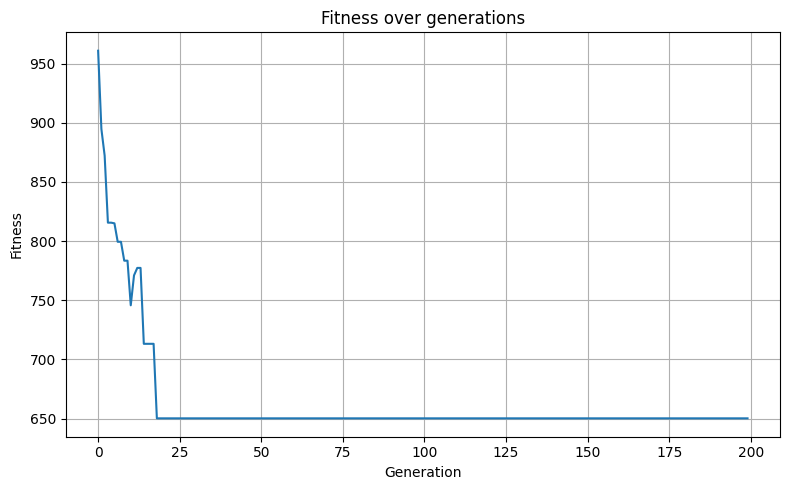

In [5]:
resultT1= analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)

    Điều chỉnh tham số của thuật toán


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 7, 9, 11, 12, 13, 10, 4, 3, 2, 5, 6, 8, 1]
Total dist : 688.68 km
Time elapsed: 0.49 s


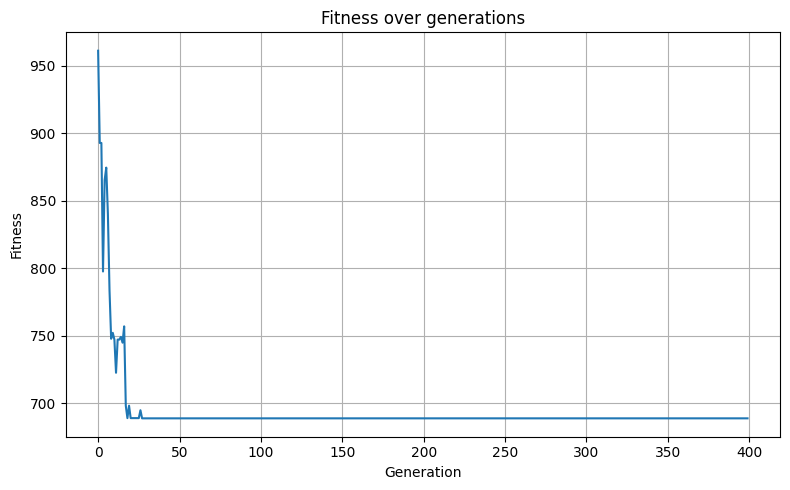

In [6]:
resultT11= analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=200,
    generations=400,
    mutation_rate=0.05
)

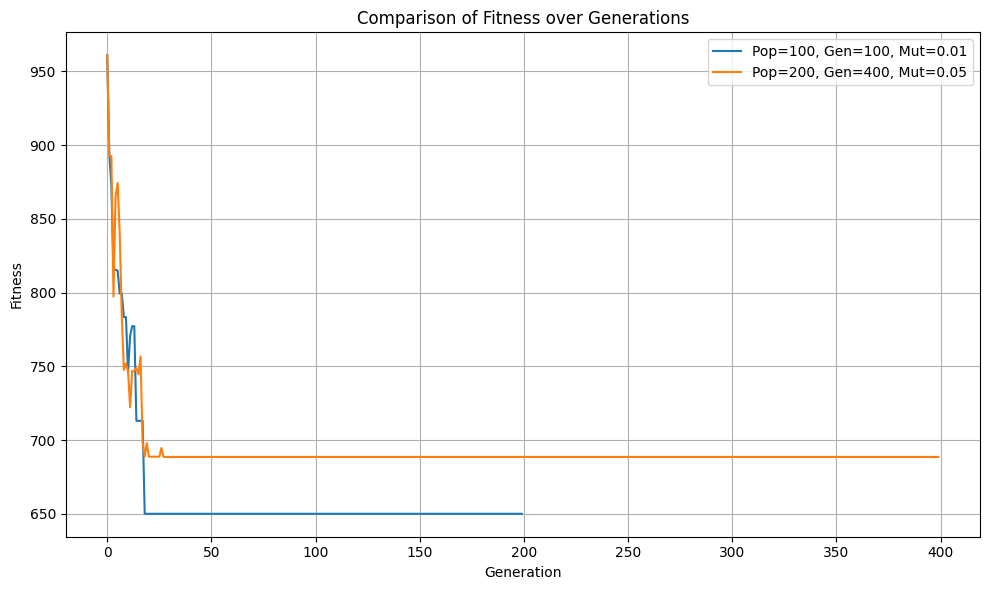

In [7]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(resultT1['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(resultT11['fitness_history'], label='Pop=200, Gen=400, Mut=0.05')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Fitness tuy có giảm chậm nhưng sâu hơn so với lần trước, bắt đầu từ giá trị cao khoảng 1000 và giảm xuống khoảng 670 nhanh chóng trong vài chục thế hệ đầu.
- Sau đó, fitness giữ ổn định không cải thiện thêm qua các thế hệ còn lại.
- So với đồ thị trước, tốc độ giảm fitness có phần cải thiện, chứng tỏ thuật toán có sự đa dạng và khám phá tốt hơn nhờ tham số mutation rate và population size được tăng lên.
- Tuy nhiên, vẫn tồn tại hiện tượng hội tụ sớm ở một mức fitness không thấp hơn nữa, tức thuật toán có thể vẫn bị kẹt ở cực trị cục bộ.

    Điều chỉnh thuật toán


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 7, 6, 8, 11, 9, 12, 13, 10, 4, 3, 2, 5, 1]
Total dist : 709.32 km
Time elapsed: 0.53 s


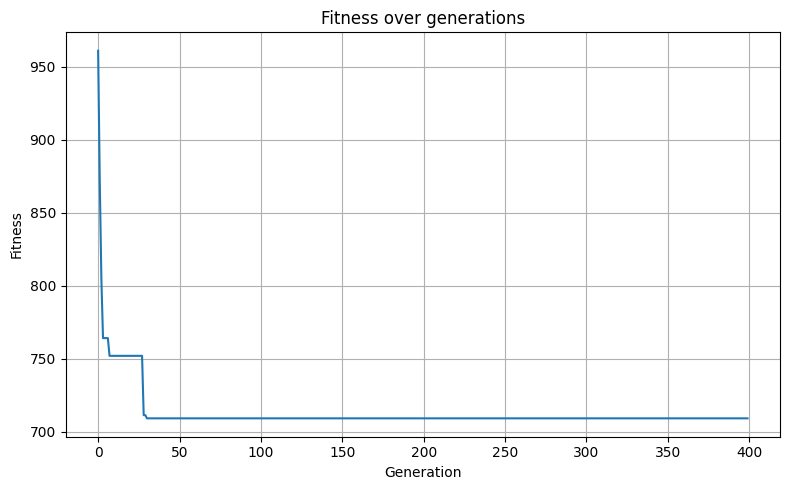

In [8]:
resultT111= analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=200,
    generations=400,
    mutation_rate=0.05,
    selection_algorithm='rank'
)

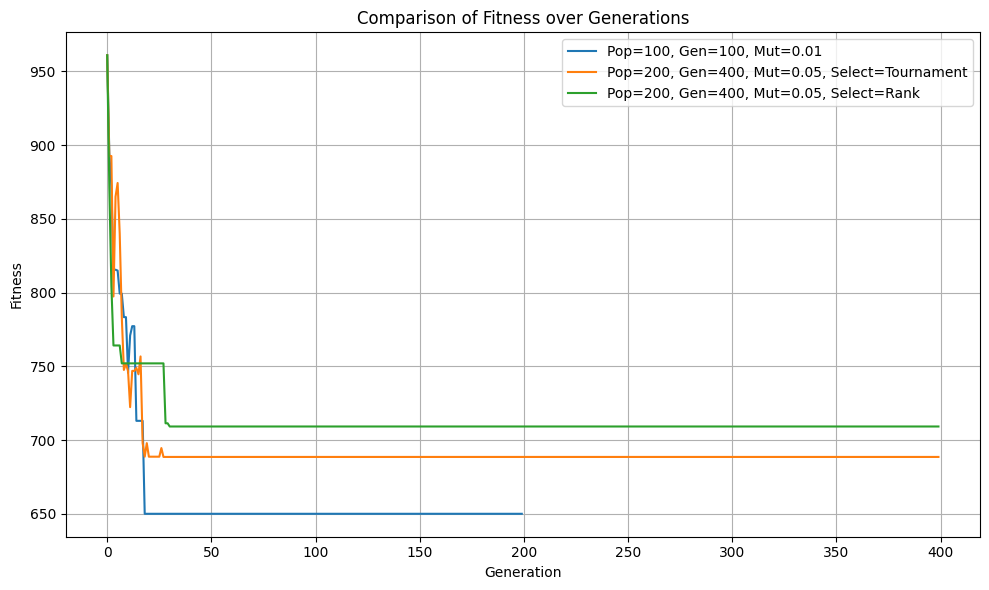

In [9]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result2
plt.plot(resultT1['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')
plt.plot(resultT11['fitness_history'], label='Pop=200, Gen=400, Mut=0.05, Select=Tournament')
plt.plot(resultT111['fitness_history'], label='Pop=200, Gen=400, Mut=0.05, Select=Rank')


plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét:** Việc thay đổi phương pháp selection sang Rank Selection không làm cải thiện chất lượng hội tụ so với Tournament Selection trong bài toán này.


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 7, 6, 8, 11, 9, 12, 13, 10, 4, 3, 2, 5, 1]
Total dist : 709.32 km
Time elapsed: 0.55 s


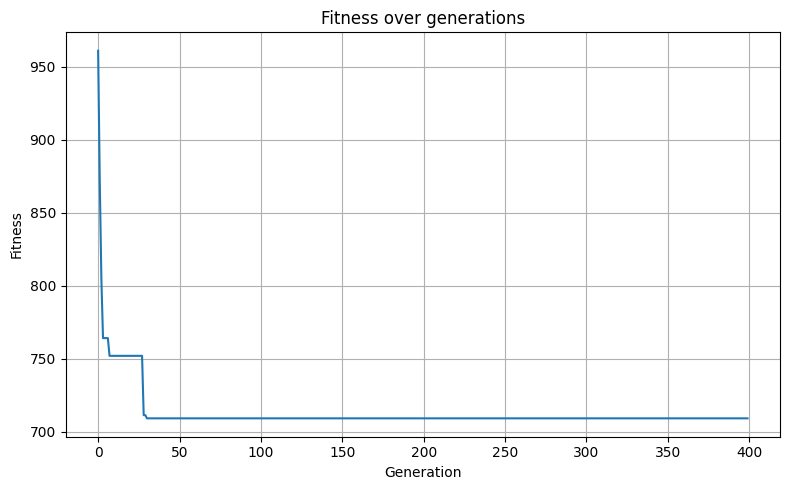

In [10]:
resultT1111= analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=200,
    generations=400,
    mutation_rate=0.05,
    selection_algorithm='rank',
    crossover_algorithm='order'
)

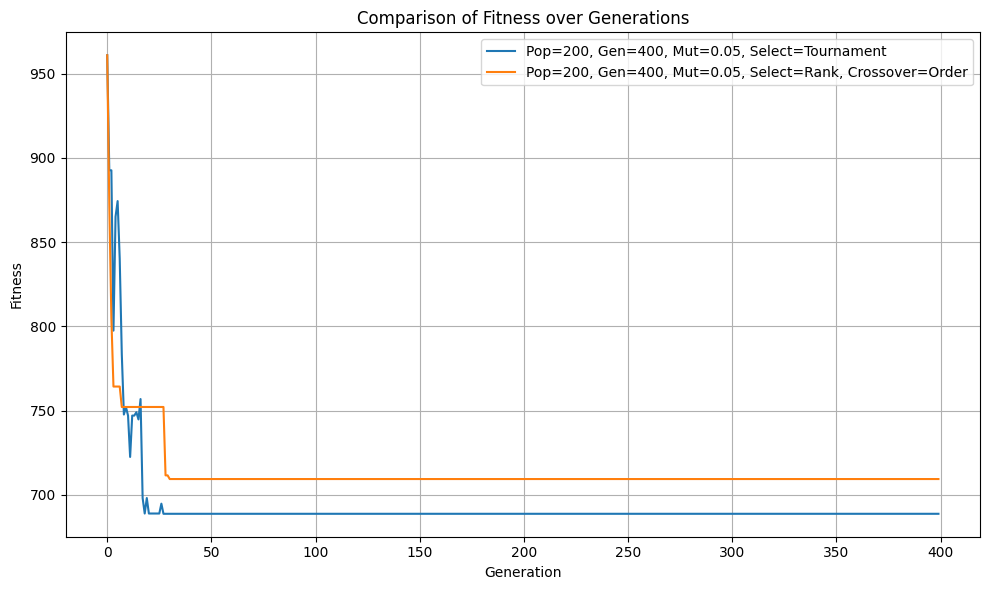

In [11]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result2
plt.plot(resultT11['fitness_history'], label='Pop=200, Gen=400, Mut=0.05, Select=Tournament')
plt.plot(resultT1111['fitness_history'], label='Pop=200, Gen=400, Mut=0.05, Select=Rank, Crossover=Order')


plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Kết luận:** Việc tăng kích thước quần thể, kéo dài số thế hệ, tăng tỷ lệ đột biến, đồng thời sử dụng Rank selection kết hợp Order crossover đã đem lại sự cải thiện rõ rệt về chất lượng lời giải và độ ổn định hội tụ cho bài toán TSP với 13 thành phố.

### 2. CentralRegion.csv (19 thành phố)


--- RESULTS for ../data/5_CentralRegion.csv ---
Best route : [1, 2, 3, 4, 5, 6, 19, 7, 14, 8, 9, 10, 11, 12, 13, 18, 17, 16, 15, 1]
Total dist : 2392.11 km
Time elapsed: 0.17 s


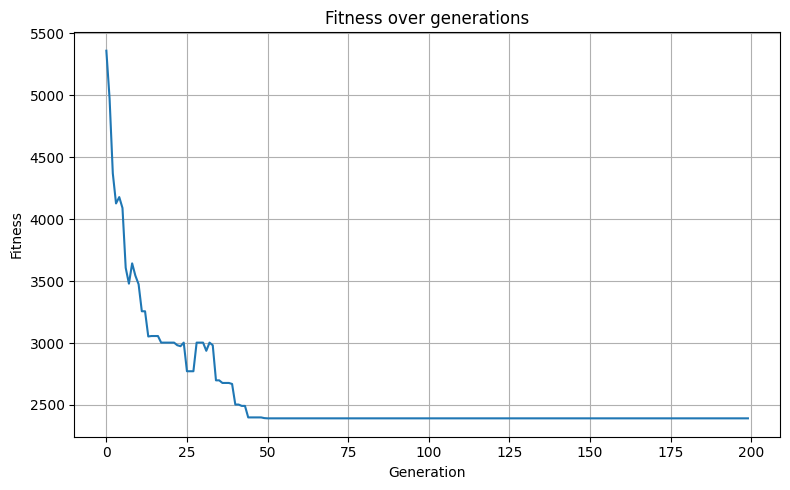

In [12]:
resultT2 = analyze_ga(
    "../data/5_CentralRegion.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)

    Điều chỉnh tham số


--- RESULTS for ../data/5_CentralRegion.csv ---
Best route : [1, 2, 3, 4, 5, 6, 19, 7, 14, 8, 9, 15, 10, 11, 12, 13, 18, 17, 16, 1]
Total dist : 2500.26 km
Time elapsed: 0.65 s


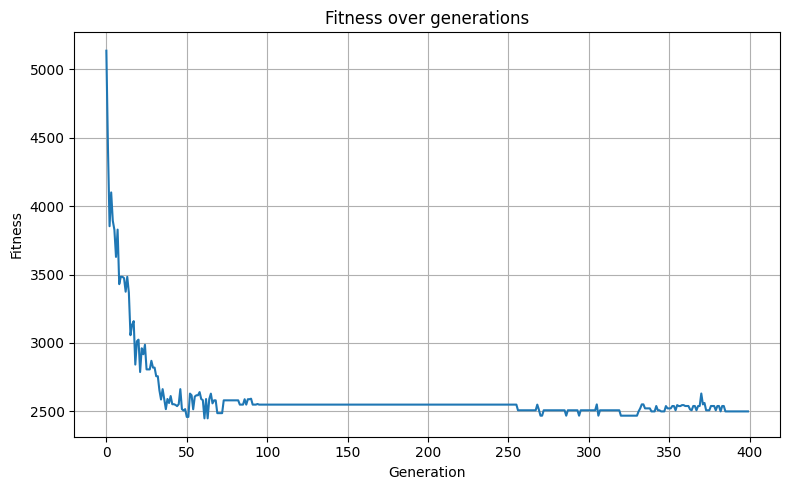

In [13]:
resultT22 = analyze_ga(
    "../data/5_CentralRegion.csv",
    population_size=200,
    generations=400,
    mutation_rate=0.05
)

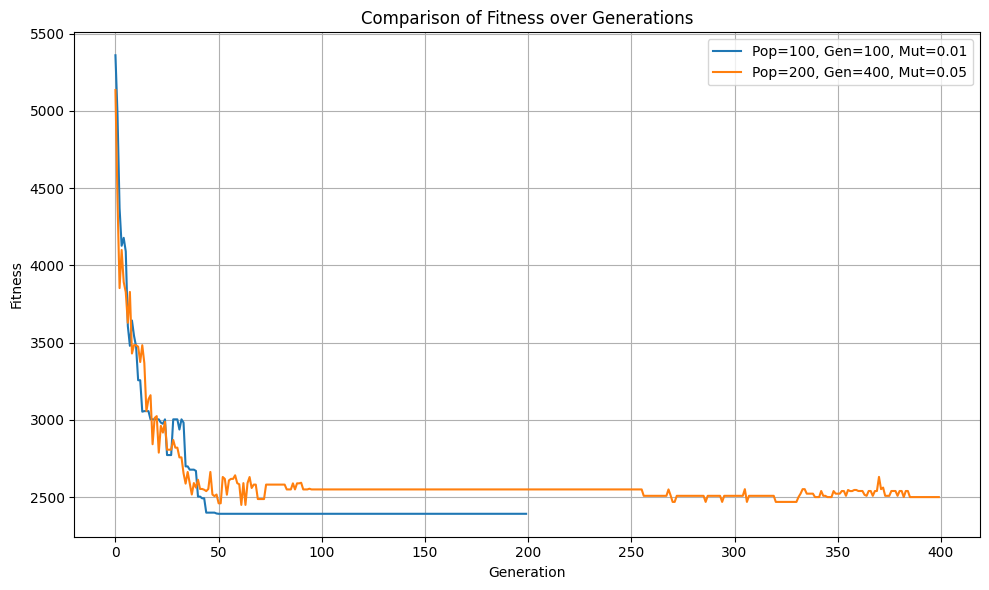

In [14]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(resultT2['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(resultT22['fitness_history'], label='Pop=200, Gen=400, Mut=0.05')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Dù đã tăng đáng kể population size và generations nhưng chất lượng lời giải không cải thiện đáng kể => Việc tăng số lượng cá thể và thế hệ đến mức này có thể đã đủ để thuật toán khai thác phần lớn khả năng tìm kiếm của nó trên bộ dữ liệu hiện tại.
- Dù đã tăng từ 0.01 lên 0.05, giúp tăng đa dạng quần thể, tuy nhiên vẫn chưa giải quyết triệt để việc bị kẹt cực trị cục bộ.

    Điều chỉnh thuật toán


--- RESULTS for ../data/5_CentralRegion.csv ---
Best route : [1, 2, 3, 4, 6, 19, 7, 8, 9, 15, 10, 16, 17, 11, 12, 13, 18, 14, 5, 1]
Total dist : 2588.88 km
Time elapsed: 0.19 s


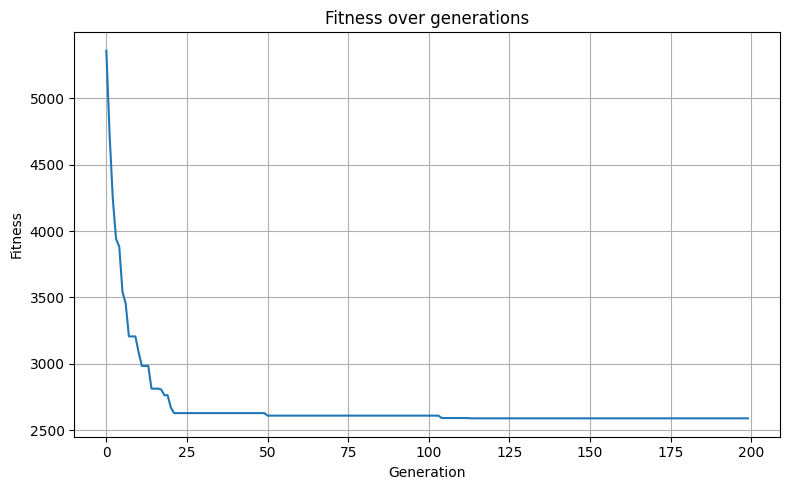

In [15]:
resultT222 = analyze_ga(
    "../data/5_CentralRegion.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01,
    selection_algorithm='rank'
)

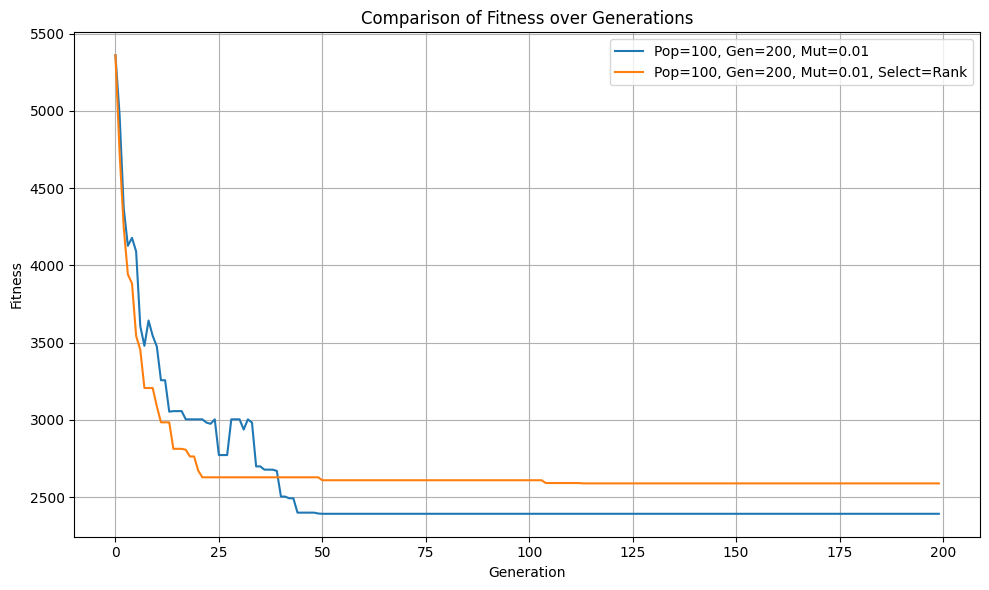

In [16]:
plt.figure(figsize=(10,6))


# Vẽ fitness của result2
plt.plot(resultT2['fitness_history'], label='Pop=100, Gen=200, Mut=0.01')
plt.plot(resultT222['fitness_history'], label='Pop=100, Gen=200, Mut=0.01, Select=Rank')


plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


--- RESULTS for ../data/5_CentralRegion.csv ---
Best route : [1, 2, 3, 4, 6, 19, 7, 8, 9, 15, 10, 16, 17, 11, 12, 13, 18, 14, 5, 1]
Total dist : 2588.88 km
Time elapsed: 0.16 s


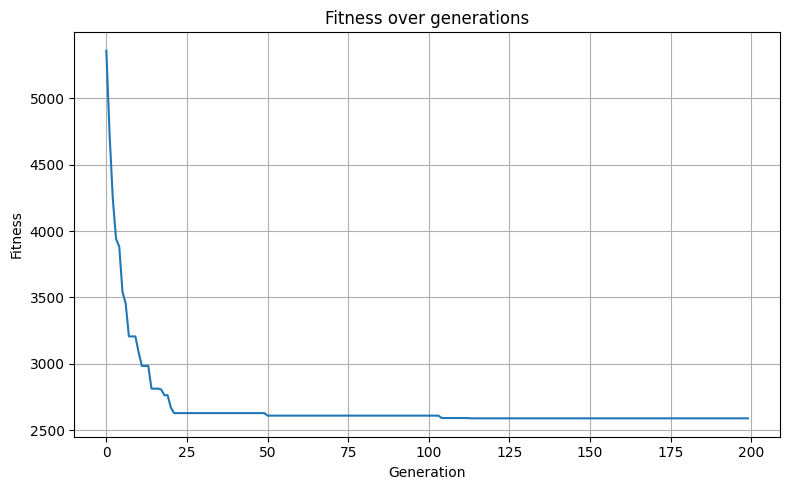

In [17]:
resultT2222 = analyze_ga(
    "../data/5_CentralRegion.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01,
    selection_algorithm='rank',
    crossover_algorithm='order'
)

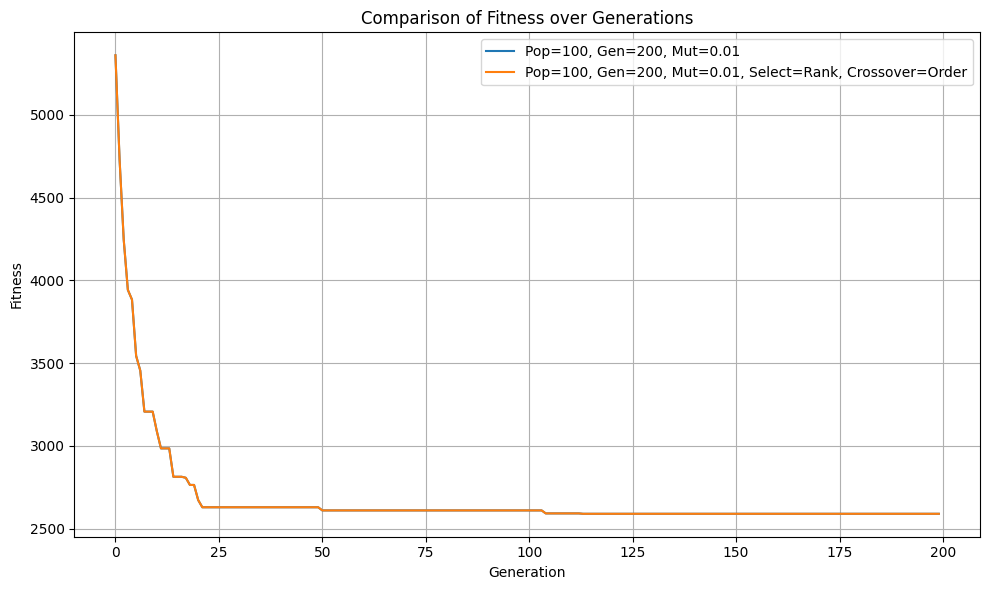

In [18]:
plt.figure(figsize=(10,6))


# Vẽ fitness của result2
plt.plot(resultT222['fitness_history'], label='Pop=100, Gen=200, Mut=0.01')
plt.plot(resultT2222['fitness_history'], label='Pop=100, Gen=200, Mut=0.01, Select=Rank, Crossover=Order')


plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Kết luận:**
- Tournament selection + Single-point crossover + Swap mutation với pop_size=100, generations=200, mutation_rate=0.01 hội tụ rất nhanh nhưng dễ kẹt ở nghiệm cục bộ, cho kết quả chưa thực sự tối ưu.
- Ở nhóm trung bình, cần thay đổi tham số hoặc thuật toán để thu được kết quả tốt hơn

## TRƯỜNG HỢP 3: NHÓM LỚN (25+ THÀNH PHỐ)


--- RESULTS for ../data/8_VietNam.csv ---
Best route : [1, 58, 50, 38, 63, 44, 3, 55, 54, 56, 24, 26, 49, 23, 46, 57, 21, 17, 10, 36, 11, 32, 16, 47, 40, 42, 31, 30, 6, 27, 41, 35, 18, 52, 22, 4, 60, 14, 37, 62, 25, 53, 2, 9, 34, 8, 43, 7, 5, 28, 61, 51, 19, 45, 48, 15, 39, 29, 59, 33, 12, 13, 20, 1]
Total dist : 11756.51 km
Time elapsed: 0.56 s


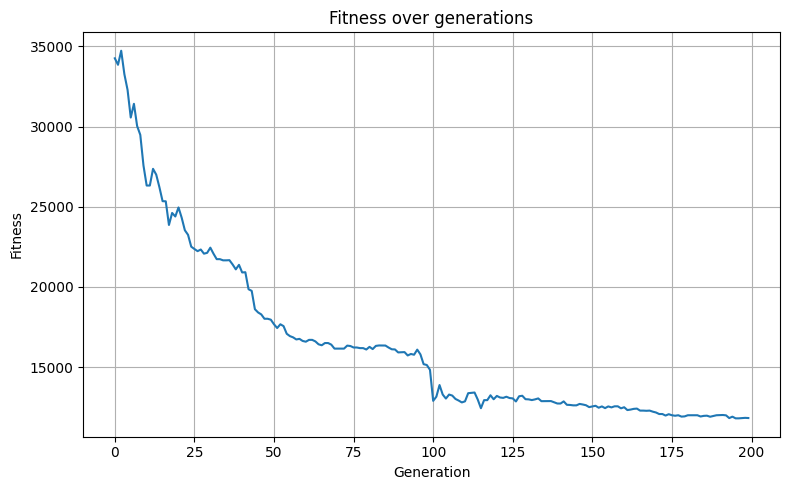

In [19]:
resultN3 = analyze_ga(
    "../data/8_VietNam.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)


--- RESULTS for ../data/8_VietNam.csv ---
Best route : [1, 20, 33, 12, 5, 51, 28, 13, 61, 59, 7, 58, 39, 29, 9, 53, 10, 36, 43, 32, 16, 21, 48, 47, 15, 57, 34, 17, 19, 2, 11, 45, 8, 50, 46, 25, 41, 56, 42, 23, 40, 54, 27, 49, 37, 55, 62, 24, 31, 26, 3, 6, 30, 44, 52, 18, 35, 38, 22, 14, 4, 60, 63, 1]
Total dist : 6584.81 km
Time elapsed: 49.22 s


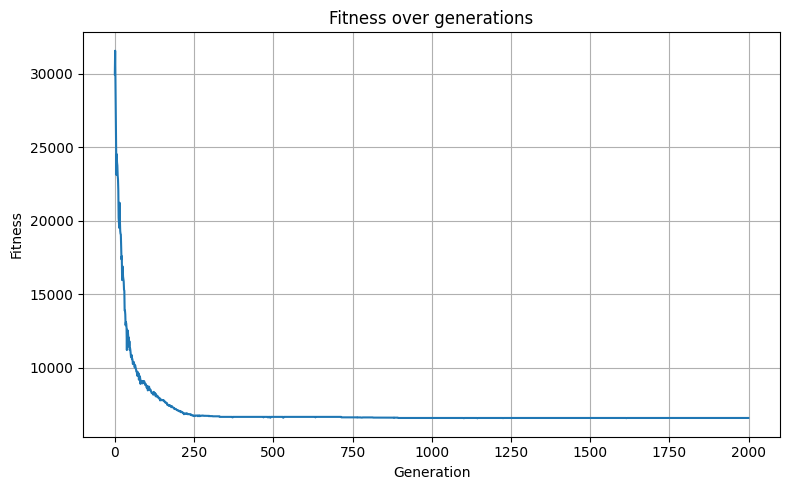

In [20]:
resultN33 = analyze_ga(
    "../data/8_VietNam.csv",
    population_size=700,
    generations=2000,
    mutation_rate=0.01
)

- Thuật toán GA bắt đầu với giá trị fitness rất cao (tổng khoảng cách lớn), thể hiện lời giải ban đầu kém.
- Fitness giảm nhanh trong khoảng vài trăm thế hệ đầu, phản ánh quá trình tối ưu hiệu quả, thuật toán tìm được các giải pháp tốt hơn.
- Sau khoảng thế hệ 250, fitness gần như ổn định quanh mức ~6,000, cho thấy thuật toán đã hội tụ và không còn cải thiện đáng kể nữa.
- Tăng đáng kể pop size và gen giúp tìm ra đường đi ngắn hơn đáng kể.


--- RESULTS for ../data/8_VietNam.csv ---
Best route : [1, 41, 56, 42, 40, 54, 15, 48, 21, 16, 36, 2, 7, 59, 61, 20, 39, 53, 9, 10, 17, 34, 47, 57, 50, 46, 25, 23, 31, 24, 6, 3, 26, 27, 49, 37, 14, 4, 55, 62, 44, 63, 60, 22, 38, 35, 18, 52, 30, 8, 45, 32, 43, 11, 19, 29, 58, 13, 33, 28, 51, 5, 12, 1]
Total dist : 7372.33 km
Time elapsed: 59.89 s


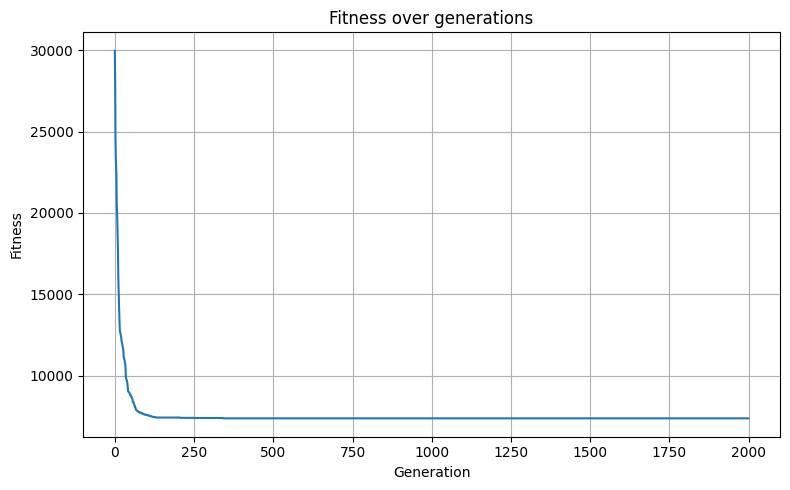

In [21]:
resultN333 = analyze_ga(
    "../data/8_VietNam.csv",
    population_size=700,
    generations=2000,
    mutation_rate=0.01,
    selection_algorithm='rank',
    crossover_algorithm='order'
)

Việc thay đổi thuật toán tuy đạt hội tụ sớm hơn nhưng không đem lại kết quả tốt hơn.